最近在学Michigan大学Data science课程的第三门[Applied Machine Learning in Python](https://www.coursera.org/learn/python-machine-learning/home/welcome). 

唉, 老师讲课好差劲. 听一遍一点印象都没有, 很快就忘了. 如果一个老师如果上课的时候不写板书, 只用PPT, 高概率不是个好老师. 连作业里的代码风格都很差劲, 哪有在函数内部import的, 交作业的时候还得自己把matplotlib给注释掉.  

就是这个老师啦: 

![](https://coursera-instructor-photos.s3.amazonaws.com/61/58158043d011e69605657346ccd592/kevyn.jpg)

Kevyn Collins-Thompson

所以, 得趁着刚写完作业, 还有些印象, 赶紧记录下来.

这门课讲的也是机器学习, 但不是深度学习, 而是更为"传统"一些的. 用到的主要是Scikit-Learn. 

关于Scikit-learn, datacamp上有个[cheat sheet](https://www.datacamp.com/community/blog/scikit-learn-cheat-sheet)看起来不错, 而且[SciKit-Learn自己的说明文档](http://scikit-learn.org/stable/documentation.html)也很不错. 以后还是看这些文档参考. 

<!-- TEASER_END -->

# 常用算法

这门课主要讲了SciKit-Learn里几个常用的算法: 

* KNN
* 线性回归: 最小二乘拟合, Ridge, Lasso, Polynomial Regression
* Logistic Regression
* 支持向量机: 线性和Kernelized
* 多层分类
* Cross-Validation
* Decision Trees

# 通用步骤

## 分开数据集

之前可能还需要归一化. 

传统的机器学习方法, 数据集的数量可能并不大, 因此还是会留出1/5~1/4的数据作为test set. 要用train_test_split把数据集分开. 

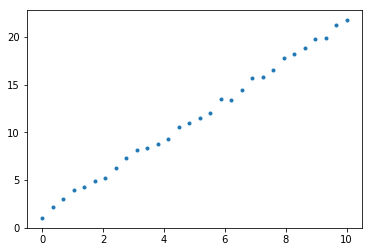

In [15]:
# 随便给个数据集
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
X=np.linspace(0,10,30).reshape(-1,1)
y= X*2+1+1*np.random.random_sample(X.shape)
plt.figure()
plt.plot(X,y,'.')

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

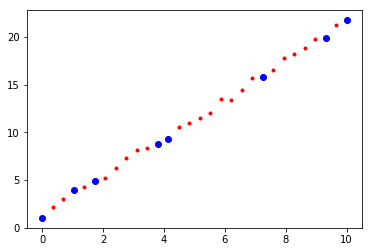

In [17]:
plt.figure()
plt.plot(X_train,y_train,'.',color="red")
plt.plot(X_test,y_test,'o',color="blue")

## 设模型并训练

一般来说设定模型就是模型().fit(X_train,y_train), 

要应用训练好的模型就用模型.predict(X), 

评估的话, 就是模型.score(X_train, y_train) 和模型.score(X_test, y_test)

R-squared score (training): 0.997
R-squared score (test): 0.998


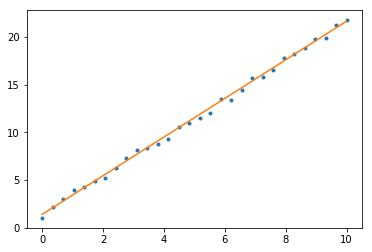

In [24]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression().fit(X_train,y_train)
plt.figure()
plt.plot(X,y,'.')
plt.plot(X,linreg.predict(X))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

# 各模型总结

|含义| 函数|cost function| 参数| 过拟合时调参|
|:--|:--|:--|:--|
|常规线性拟合|LinearRegression| MSE |无| 无|
|参数L2约束(平方和)的线性拟合|Ridge|MSE+alpha* Sum(w^2)| alpha| 增大alpha|
|参数L1约束(稀疏)的线性拟合|Lasso|MSE+ alpha* Sum(abs(w))| alpha=2.0, max_iter = 10000|增大alpha|
|多项式拟合|PolynomialFeatures|先poly = PolynomialFeatures(degree=2), 然后X_poly = poly.fit_transform(X), 再送入各种线性拟合|同Ridge或Lasso|同Ridge或Lasso|
|其实就是Sigmoid|LogisticRegression||C, 负责L2约束|减小C|
|线性SVM|LinearSVC||C| 减小C|
|Kernelized SVM|SVC(kernel = "rbf")||C, 负责曲面的平滑, gamma, 负责局部点的重要性|减小C, 减小gamma|
|决策树|DecisionTreeClassifier||max_depth, min_samples_leaf| 减小max_depth, 增大min_samples_leaf|